## Import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

## Load the data

In [2]:
data=pd.read_csv('bank_notes.csv')
data.shape

(1372, 5)

## Data analysis

In [3]:
data.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
data.describe()

,variance,skewness,curtosis,entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Data Visualization

In [6]:
data.Target.value_counts()

0    762
1    610
Name: Target, dtype: int64

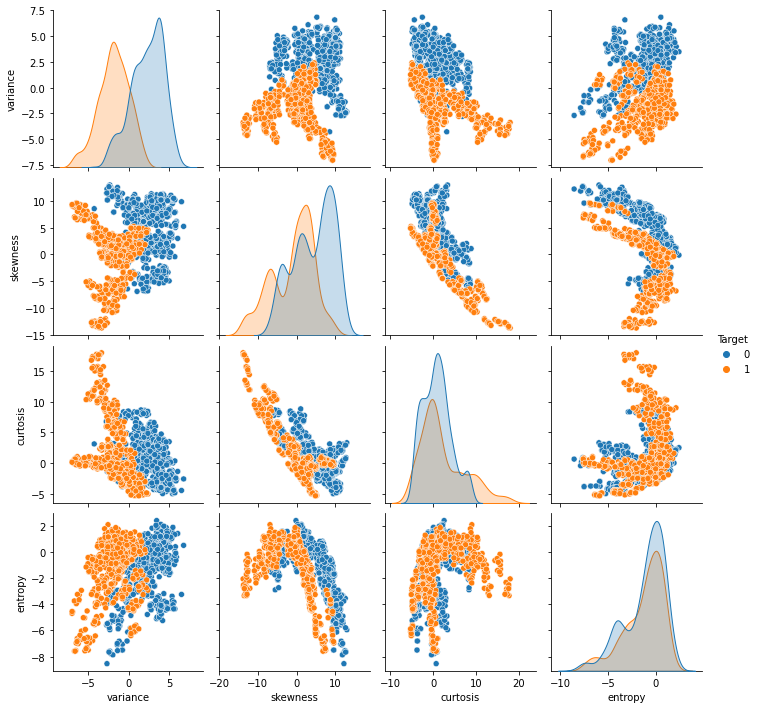

In [7]:
sns.pairplot(data, hue='Target')

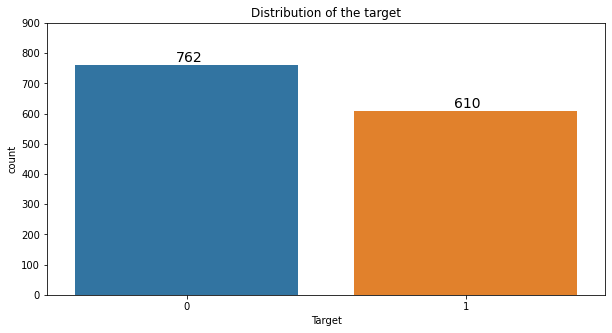

In [8]:
plt.figure(figsize=(10,5))
plt.title("Distribution of the target")
sns.countplot(x=data['Target'])
target_count=data.Target.value_counts()
plt.annotate(s=target_count[0], xy=(-0.04, 10 + target_count[0]), size=14)
plt.annotate(s=target_count[1],xy=(0.96, 10 + target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

## split the data into dependent feature and independent feature

In [9]:
X=data.drop('Target', axis=1)
y=data['Target']
X.shape, y.shape

((1372, 4), (1372,))

## Building Machine learning model 

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Split the data into train and test split

In [11]:
x_train ,x_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((960, 4), (412, 4), (960,), (412,))

## feature scaling 

In [12]:
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.fit_transform(x_test)
x_train_scale[:5], x_test_scale[:5]

(array([[ 0.10527877, -0.27983064,  0.2259937 ,  0.78802844],
        [-0.99840564, -1.18889897,  1.31324557,  0.52830217],
        [-0.4363023 , -0.32105208, -0.31909545,  0.38825872],
        [-0.89636532, -0.1601366 , -0.42463686,  0.0335318 ],
        [-1.03559558, -0.38650242,  0.03167312,  0.33828751]]),
 array([[-1.34946799,  0.01268962, -0.3144986 , -0.56584205],
        [ 0.30870117,  0.44097917,  0.12785175,  0.69838817],
        [-1.508485  , -1.63664604,  2.26112673, -0.09008019],
        [-1.88418526,  0.78067659, -0.36414744, -2.50023078],
        [ 1.09901193, -0.16218087, -0.01192844,  0.9595783 ]]))

## LogisticRegressiom for bank Notes

In [13]:
logistic=LogisticRegression()
logistic.fit(x_train_scale, y_train)
print("training set score : {}".format(logistic.score(x_train_scale, y_train)))
print("testing set score : {}".format(logistic.score(x_test_scale, y_test)))
y_pred=logistic.predict(x_test_scale)
print('classification report : {}'.format(classification_report(y_test, y_pred)))

print('\n')

print('confusion matrix : {}'.format(confusion_matrix(y_test, y_pred)))

training set score : 0.9833333333333333
testing set score : 0.9757281553398058
classification report :               precision    recall  f1-score   support

           0       0.99      0.97      0.98       235
           1       0.96      0.99      0.97       177

    accuracy                           0.98       412
   macro avg       0.97      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



confusion matrix : [[227   8]
 [  2 175]]


## Decision tree classifier 

In [14]:
tree=DecisionTreeClassifier(max_depth=5)
tree.fit(x_train_scale, y_train)
print("training set score : {}".format(tree.score(x_train_scale, y_train)))
print("testing set score : {}".format(tree.score(x_test_scale, y_test)))

y_pred01=tree.predict(x_test_scale)
print('classification report : {}'.format(classification_report(y_test, y_pred01)))

print('\n')

print('confusion matrix : {}'.format(confusion_matrix(y_test, y_pred01)))

training set score : 0.9885416666666667
testing set score : 0.9587378640776699
classification report :               precision    recall  f1-score   support

           0       0.99      0.94      0.96       235
           1       0.93      0.98      0.95       177

    accuracy                           0.96       412
   macro avg       0.96      0.96      0.96       412
weighted avg       0.96      0.96      0.96       412



confusion matrix : [[221  14]
 [  3 174]]


## Support vector machine

In [15]:
svm=SVC(C=0.1)
svm.fit(x_train_scale, y_train)
print("training set score : {}".format(svm.score(x_train_scale, y_train)))
print("testing set score : {}".format(svm.score(x_test_scale, y_test)))
y_pred1=svm.predict(x_test_scale)
print('classification report : {}'.format(classification_report(y_test, y_pred1)))

print('\n')

print('confusion matrix : {}'.format(confusion_matrix(y_test, y_pred1)))

training set score : 0.9916666666666667
testing set score : 0.9830097087378641
classification report :               precision    recall  f1-score   support

           0       1.00      0.97      0.98       235
           1       0.96      1.00      0.98       177

    accuracy                           0.98       412
   macro avg       0.98      0.99      0.98       412
weighted avg       0.98      0.98      0.98       412



confusion matrix : [[228   7]
 [  0 177]]


#### If we apply the the process of the imbalanced dataset then there are some technique which is handle
#### the imbalanced data
###### 1. Undersampling 
###### 2. oversampling

## here target feature contain the imbalaned data so we apply  the undersampling 
1. This is the easiest way to randomly drop the number of instances of the overrepresented this traget feature.This is called random undersamplng.

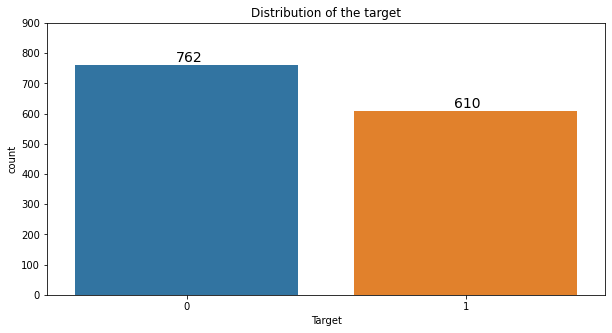

In [16]:
plt.figure(figsize=(10,5))
plt.title("Distribution of the target")
sns.countplot(x=data['Target'])
target_count=data.Target.value_counts()
plt.annotate(s=target_count[0], xy=(-0.04, 10 + target_count[0]), size=14)
plt.annotate(s=target_count[1],xy=(0.96, 10 + target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

In [17]:
to_delete=target_count[0] - target_count[1]
data=data.sample(frac=1, random_state=42).sort_values(by='Target')
data=data[to_delete:]
data.Target.value_counts()

1    610
0    610
Name: Target, dtype: int64

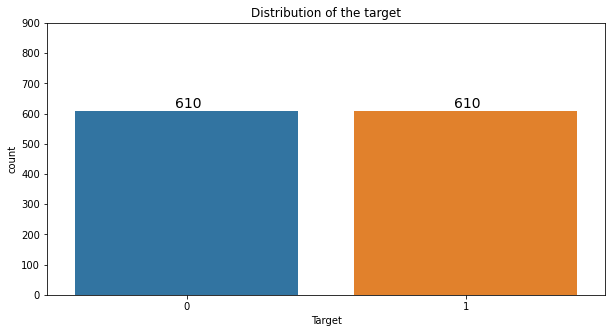

In [18]:
plt.figure(figsize=(10,5))
plt.title("Distribution of the target")
sns.countplot(x=data['Target'])
target_count=data.Target.value_counts()
plt.annotate(s=target_count[0], xy=(-0.04, 10 + target_count[0]), size=14)
plt.annotate(s=target_count[1],xy=(0.96, 10 + target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

In [19]:
X1=data.drop('Target', axis=1)
y1=data['Target']
X1.shape, y1.shape

((1220, 4), (1220,))

In [20]:
x_train1 ,x_test1, y_train1, y_test1=train_test_split(X1, y1, test_size=0.30, random_state=1)
x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape

((854, 4), (366, 4), (854,), (366,))

In [21]:
scaler=StandardScaler()
x_train_scale1=scaler.fit_transform(x_train1)
x_test_scale1=scaler.fit_transform(x_test1)
x_train_scale1[:5], x_test_scale1[:5]

(array([[ 0.71743271, -1.12878338,  0.64119915, -0.09828972],
        [-0.13886417,  0.93798783, -0.14013347,  0.18640002],
        [-0.44694778, -1.34801114,  0.94500501,  1.02267918],
        [-0.00795689, -0.14575343, -0.80293313,  0.73163516],
        [ 0.27398642,  0.94261456, -0.8182277 , -0.81765591]]),
 array([[-1.60681098, -1.35816798,  2.16877391,  0.1739604 ],
        [ 1.06354522, -0.14032033,  0.15517753,  1.64964336],
        [ 1.38862549, -1.14218214,  0.42214306,  0.66181223],
        [ 1.20458308, -0.8477799 ,  0.22345939,  0.91842782],
        [ 0.5016935 ,  1.12293503, -0.58603775,  0.02841398]]))

In [39]:
logistic=LogisticRegression()
logistic.fit(x_train_scale1, y_train1)
print("training set score : {}".format(logistic.score(x_train_scale1, y_train1)))
print("testing set score : {}".format(logistic.score(x_test_scale1, y_test1)))
y_pred21=logistic.predict(x_test_scale1)
print('classification report : {}'.format(classification_report(y_test1, y_pred21)))

print('\n')

print('confusion matrix : {}'.format(confusion_matrix(y_test1, y_pred21)))

accuracy_logistic=accuracy_score(y_test1, y_pred21)
accuracy_logistic

training set score : 0.9847775175644028
testing set score : 0.9836065573770492
classification report :               precision    recall  f1-score   support

           0       1.00      0.97      0.98       186
           1       0.97      1.00      0.98       180

    accuracy                           0.98       366
   macro avg       0.98      0.98      0.98       366
weighted avg       0.98      0.98      0.98       366



confusion matrix : [[180   6]
 [  0 180]]


0.9836065573770492

In [38]:
svm1=SVC(C=0.2)
svm1.fit(x_train_scale1, y_train1)
print("training set score : {}".format(svm1.score(x_train_scale1, y_train1)))
print("testing set score : {}".format(svm1.score(x_test_scale1, y_test1)))
y_pred221=svm1.predict(x_test_scale1)
print('classification report : {}'.format(classification_report(y_test1, y_pred221)))

print('\n')

print('confusion matrix : {}'.format(confusion_matrix(y_test1, y_pred221)))
accuracy_svc=accuracy_score(y_test1, y_pred221)
accuracy_svc

training set score : 0.9929742388758782
testing set score : 0.9918032786885246
classification report :               precision    recall  f1-score   support

           0       1.00      0.98      0.99       186
           1       0.98      1.00      0.99       180

    accuracy                           0.99       366
   macro avg       0.99      0.99      0.99       366
weighted avg       0.99      0.99      0.99       366



confusion matrix : [[183   3]
 [  0 180]]


0.9918032786885246

In [37]:
tree1=DecisionTreeClassifier(max_depth=5)
tree.fit(x_train_scale1, y_train1)
print("training set score : {}".format(tree.score(x_train_scale1, y_train1)))
print("testing set score : {}".format(tree.score(x_test_scale1, y_test1)))

y_predict=tree.predict(x_test_scale1)
print('classification report : {}'.format(classification_report(y_test1, y_predict)))

print('\n')

print('confusion matrix : {}'.format(confusion_matrix(y_test1, y_predict)))
accuracy_tree=accuracy_score(y_test1, y_predict)
accuracy_tree

training set score : 0.9976580796252927
testing set score : 0.9754098360655737
classification report :               precision    recall  f1-score   support

           0       0.98      0.97      0.98       186
           1       0.97      0.98      0.98       180

    accuracy                           0.98       366
   macro avg       0.98      0.98      0.98       366
weighted avg       0.98      0.98      0.98       366



confusion matrix : [[181   5]
 [  4 176]]


0.9754098360655737

In [40]:
model=['Logistic Reegression', 'SVC', 'DEcision Tree Classifier']
accuracy=[accuracy_logistic, accuracy_svc,accuracy_tree]
result=pd.DataFrame({'Model':model, 'Accuracy':accuracy})
result

,Model,Accuracy
0,Logistic Reegression,0.983607
1,SVC,0.991803
2,DEcision Tree Classifier,0.975410
